In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## timeseries package
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from datetime import timedelta
from numpy import log

# Loading data

In [3]:
df = pd.read_csv("/content/XAUUSD.xls")
df.head()

,Date,Open,High,Low,Close,Change(Pips),Change(%)
0,7/4/2023 0:00,1921.07,1930.22,1920.34,1929.65,858,0.44
1,7/3/2023 0:00,1917.70,1930.50,1910.11,1921.17,347,0.18
2,7/2/2023 0:00,1920.30,1920.30,1917.50,1917.70,-260,-0.14
3,6/30/2023 0:00,1908.71,1922.61,1900.57,1919.20,1049,0.55
4,6/29/2023 0:00,1909.47,1913.00,1893.16,1908.76,-71,-0.04


In [4]:
df.columns


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Change(Pips)', 'Change(%)'], dtype='object')

In [5]:
df.dtypes
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622 entries, 0 to 621
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          622 non-null    object 
 1   Open          622 non-null    float64
 2   High          622 non-null    float64
 3   Low           622 non-null    float64
 4   Close         622 non-null    float64
 5   Change(Pips)  622 non-null    int64  
 6   Change(%)     622 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 34.1+ KB


,Open,High,Low,Close,Change(Pips),Change(%)
count,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000
mean,1833.470354,1844.208939,1822.538248,1833.592749,12.239550,0.003617
std,94.417731,95.163303,93.223079,94.345885,1480.617616,0.804528
min,1627.270000,1640.760000,1615.040000,1626.890000,-5559.000000,-3.050000
25%,1775.080000,1787.085000,1765.435000,1774.957500,-704.000000,-0.380000
50%,1815.230000,1826.375000,1808.335000,1815.470000,11.500000,0.005000
75%,1913.792500,1924.717500,1896.670000,1914.700000,749.500000,0.410000
max,2052.780000,2071.320000,2030.770000,2051.930000,6612.000000,3.330000


#Convert Data-time format

**Date is to be in Date-time format inorder to perform a time series**

In [6]:
df = pd.read_csv("/content/XAUUSD.xls",index_col= 'Date')
print(df.head(5))
df.info()
df.index = pd.to_datetime(df.index)
print(df.index)
df.head(5)

                   Open     High      Low    Close  Change(Pips)  Change(%)
Date                                                                       
7/4/2023 0:00   1921.07  1930.22  1920.34  1929.65           858       0.44
7/3/2023 0:00   1917.70  1930.50  1910.11  1921.17           347       0.18
7/2/2023 0:00   1920.30  1920.30  1917.50  1917.70          -260      -0.14
6/30/2023 0:00  1908.71  1922.61  1900.57  1919.20          1049       0.55
6/29/2023 0:00  1909.47  1913.00  1893.16  1908.76           -71      -0.04
<class 'pandas.core.frame.DataFrame'>
Index: 622 entries, 7/4/2023 0:00 to 7/4/2021 0:00
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          622 non-null    float64
 1   High          622 non-null    float64
 2   Low           622 non-null    float64
 3   Close         622 non-null    float64
 4   Change(Pips)  622 non-null    int64  
 5   Change(%)     622 non-null    float64
dty

,Open,High,Low,Close,Change(Pips),Change(%)
Date,,,,,,
2023-07-04,1921.07,1930.22,1920.34,1929.65,858,0.44
2023-07-03,1917.70,1930.50,1910.11,1921.17,347,0.18
2023-07-02,1920.30,1920.30,1917.50,1917.70,-260,-0.14
2023-06-30,1908.71,1922.61,1900.57,1919.20,1049,0.55
2023-06-29,1909.47,1913.00,1893.16,1908.76,-71,-0.04


**Sorting Dataset**

In [7]:
df = df.sort_index()
df.head()

,Open,High,Low,Close,Change(Pips),Change(%)
Date,,,,,,
2021-07-04,1787.22,1787.73,1785.00,1786.39,-83,-0.05
2021-07-05,1786.68,1794.00,1783.80,1791.15,447,0.25
2021-07-06,1790.85,1814.89,1789.89,1795.68,483,0.27
2021-07-07,1795.28,1809.50,1793.41,1803.22,794,0.44
2021-07-08,1803.29,1818.00,1793.90,1803.75,46,0.03


# Trying to predict the closing price of gold

**In this model I am trying to predict the Closing price of gold**

Text(0, 0.5, 'Gold price')

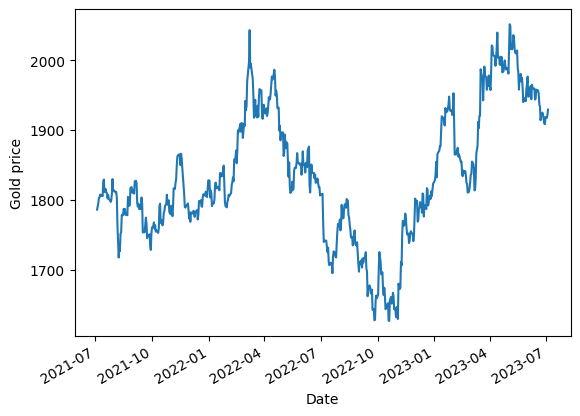

In [8]:
df['Close'].plot()
plt.ylabel("Gold price")


# ARIMA Model

In [ ]:
result = adfuller(df['Close'])
dfoutput = pd.Series(result[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
dfoutput

Test Statistic                  -1.851243
p-value                          0.355334
#Lags Used                       0.000000
Number of Observations Used    621.000000
dtype: float64

In [ ]:
for key,value in result[4].items():
   dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Test Statistic                  -1.851243
p-value                          0.355334
#Lags Used                       0.000000
Number of Observations Used    621.000000
Critical Value (1%)             -3.440924
Critical Value (5%)             -2.866205
Critical Value (10%)            -2.569255
dtype: float64


**p-value > 0.05. so we require order of differencing (D).**


## Finding the value of the d parameter

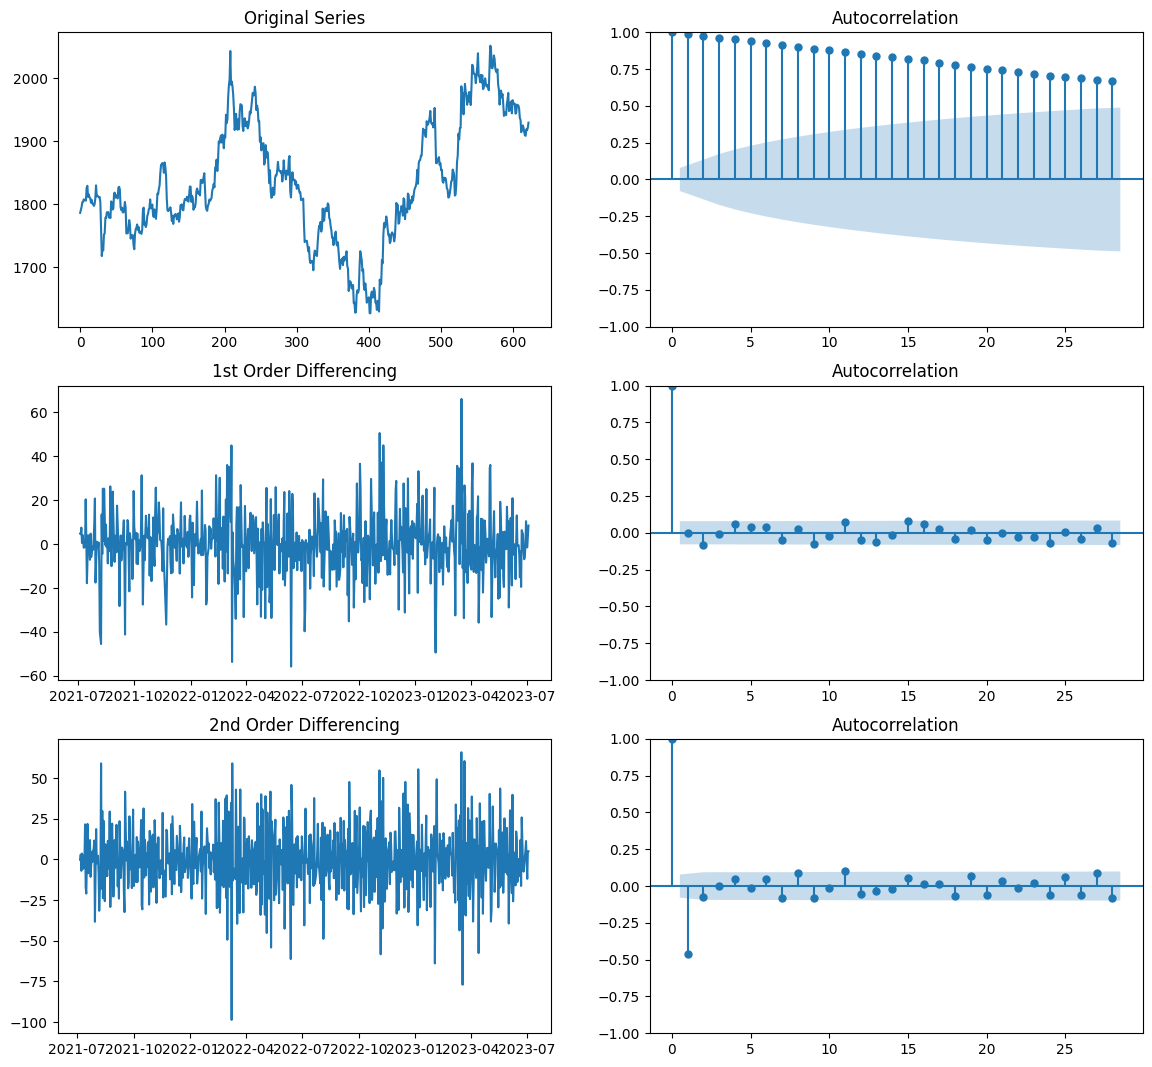

In [11]:
# Original Series
fig, axes = plt.subplots(3, 2, sharex=False)

fig.set_size_inches(14,13)

axes[0, 0].plot(df['Close'].values); axes[0, 0].set_title('Original Series')
plot_acf(df['Close'].values, ax=axes[0, 1])


# 1st Differencing
axes[1, 0].plot(df['Close'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df['Close'].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df['Close'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df['Close'].diff().diff().dropna(), ax=axes[2, 1])

plt.show()

**second-order differencing the immediate lag has gone on the negative side, representing that in the second-order the series has become over the difference, so d=1.**

## Finding the value of the p parameter

In [12]:
#ACF and PACF plots:
lag_acf = acf(df['Close'], nlags=30)
lag_pacf = pacf(df['Close'], nlags=50, method='ols')

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


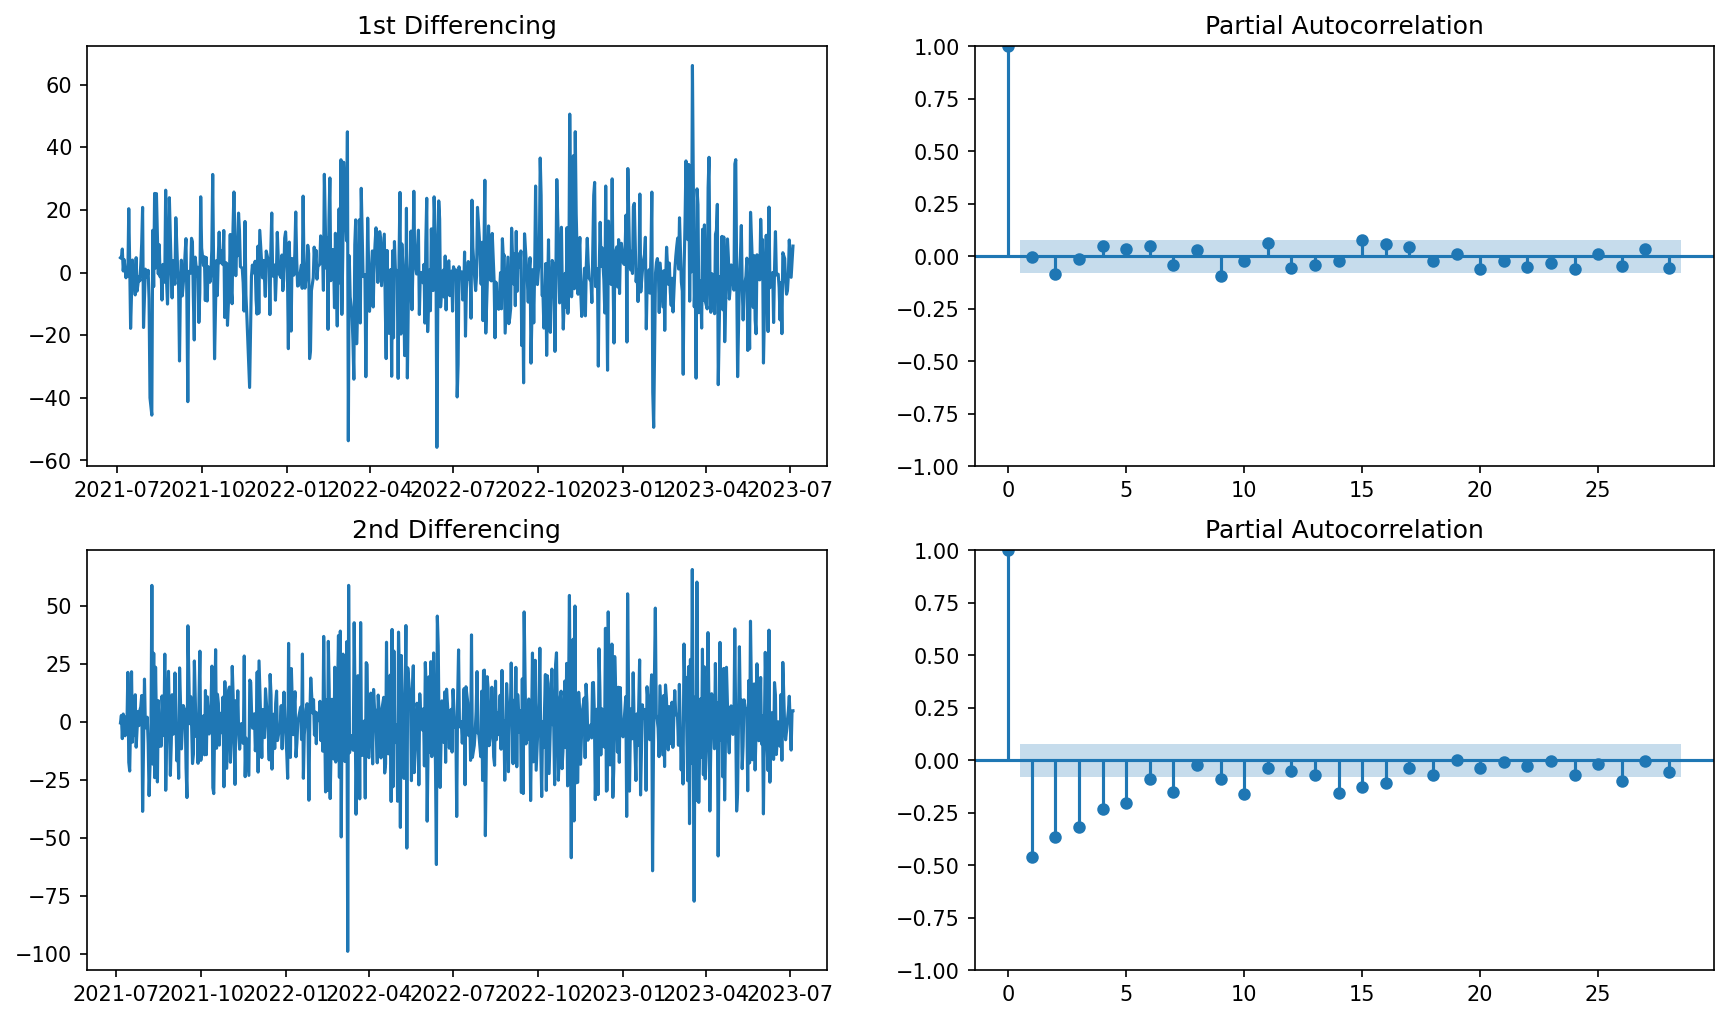

In [13]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(14,8), 'figure.dpi':150})

## first order differencing
fig, axes = plt.subplots(2, 2, sharex=False)
axes[0, 0].plot(df['Close'].diff()); axes[0, 0].set_title('1st Differencing')
plot_pacf(df['Close'].diff().dropna(), ax=axes[0, 1])

## second order differencing
axes[1, 0].plot(df['Close'].diff().diff()); axes[1, 0].set_title('2nd Differencing')
plot_pacf(df['Close'].diff().diff().dropna(), ax=axes[1, 1])

plt.show()

**The lag value where the PACF chart crosses the upper confidence interval for the first time is p = 1. (tentatively).**

## Finding the value of the q parameter

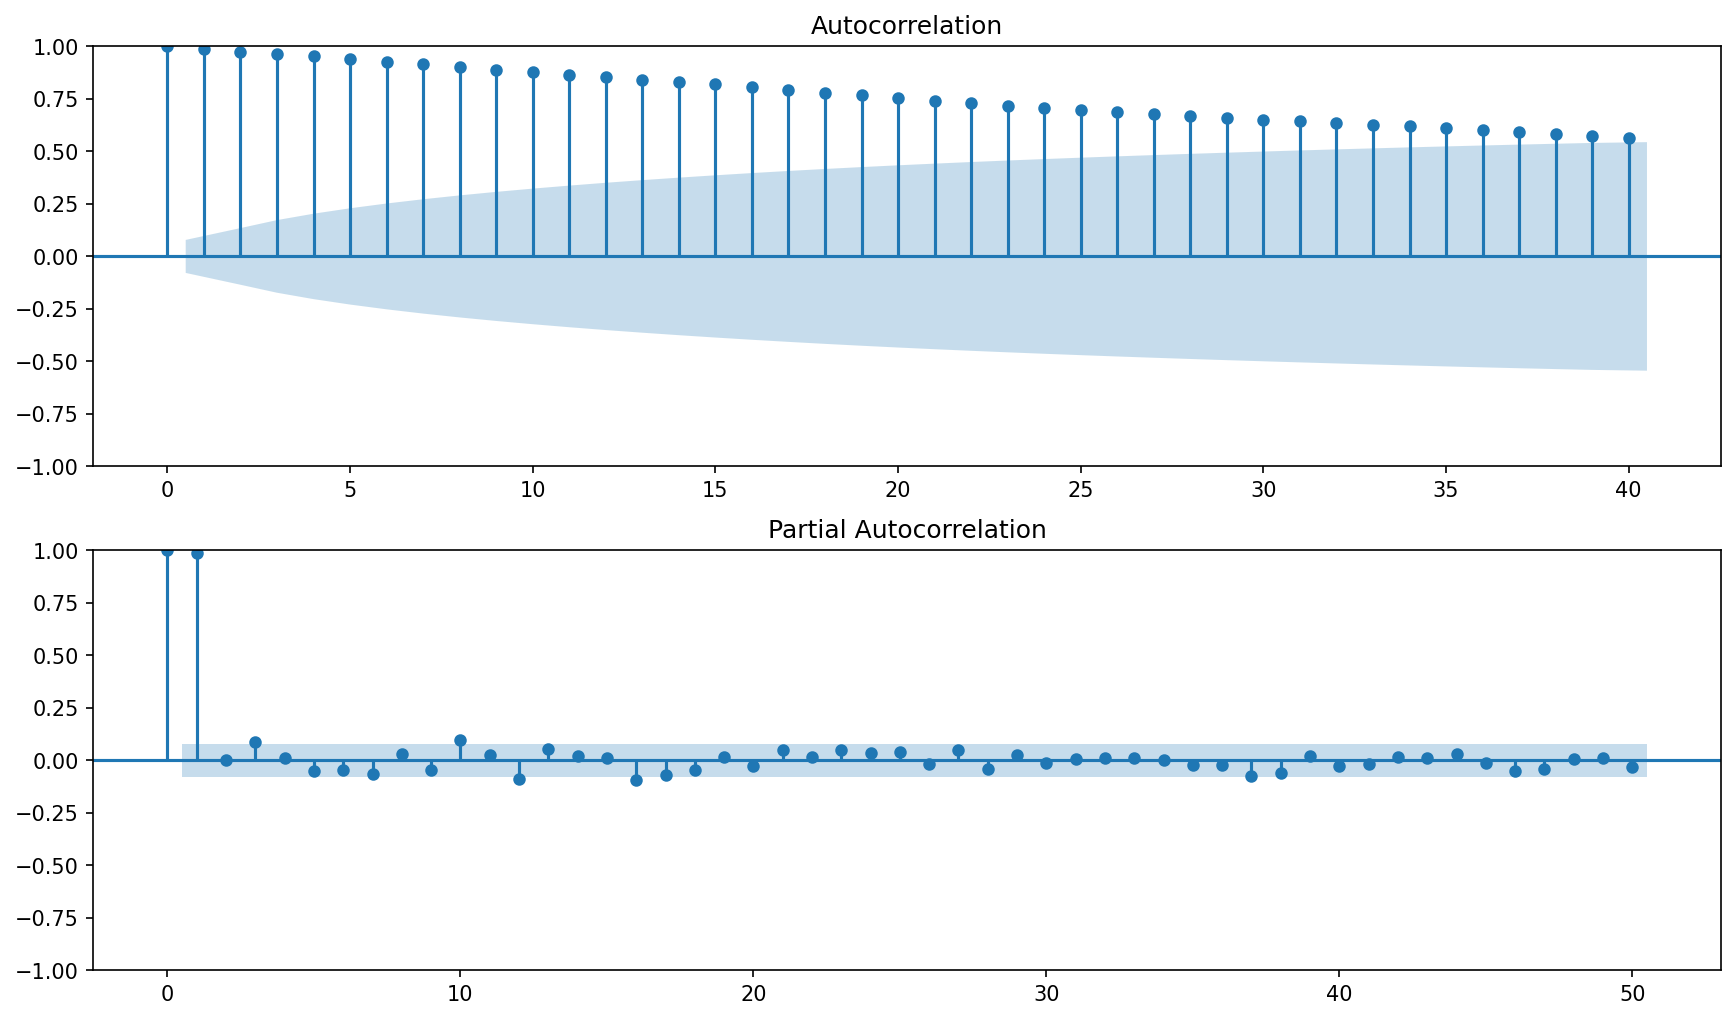

In [14]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
pyplot.figure()
pyplot.subplot(211)
plot_acf(df['Close'], ax=pyplot.gca(),lags=40)
pyplot.subplot(212)
plot_pacf(df['Close'], ax=pyplot.gca(), lags=50)
pyplot.show()

**The lag value where the ACF chart crosses the upper confidence interval for the first time is q = 40.(tentatively)**

## AR Model

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


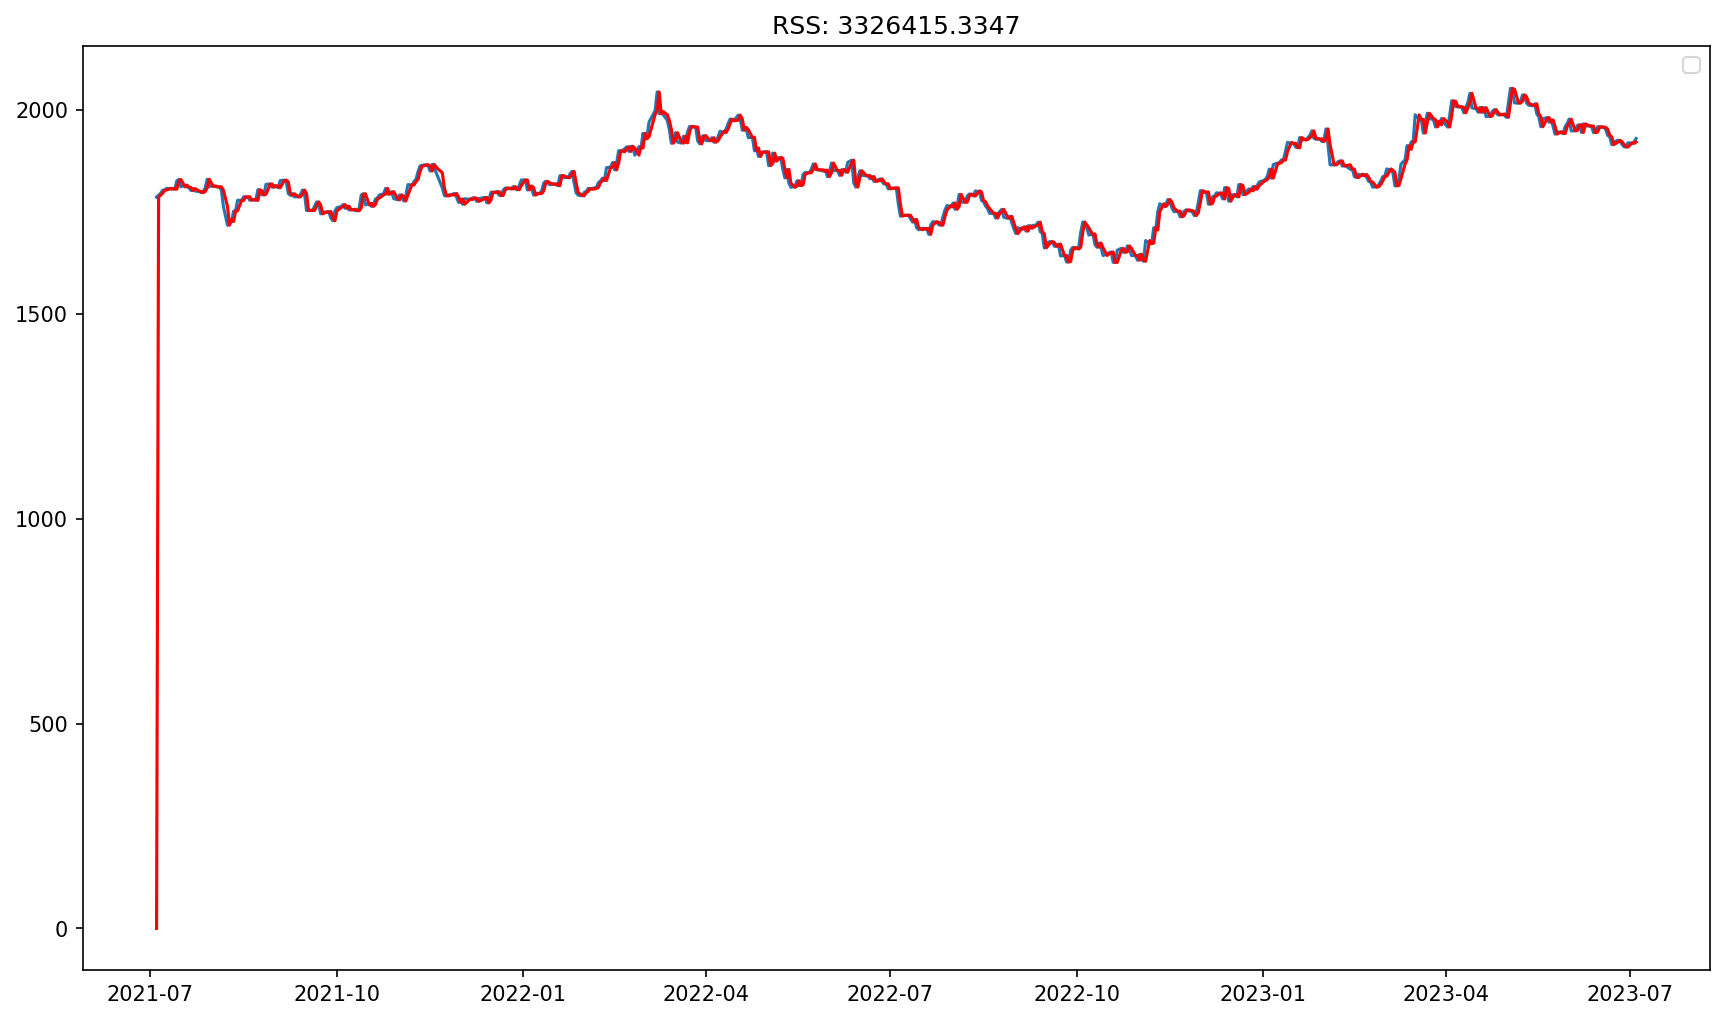

In [21]:
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(df['Close'], order=(1, 1, 0))
results_AR = model.fit()
plt.plot(df['Close'])
plt.plot(results_AR.fittedvalues, color='red')
RSS = results_AR.fittedvalues-df['Close']
RSS.dropna(inplace=True)
plt.title('RSS: %.4f'% sum(RSS**2))
plt.legend(loc = 'best')

In [22]:
print(results_AR.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  622
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -2552.698
Date:                Tue, 11 Jul 2023   AIC                           5109.396
Time:                        19:57:59   BIC                           5118.259
Sample:                             0   HQIC                          5112.841
                                - 622                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0026      0.036     -0.071      0.943      -0.074       0.068
sigma2       217.7551      9.049     24.063      0.000     200.018     235.492
Ljung-Box (L1) (Q):                   0.00   Jarque-

## MA Model

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


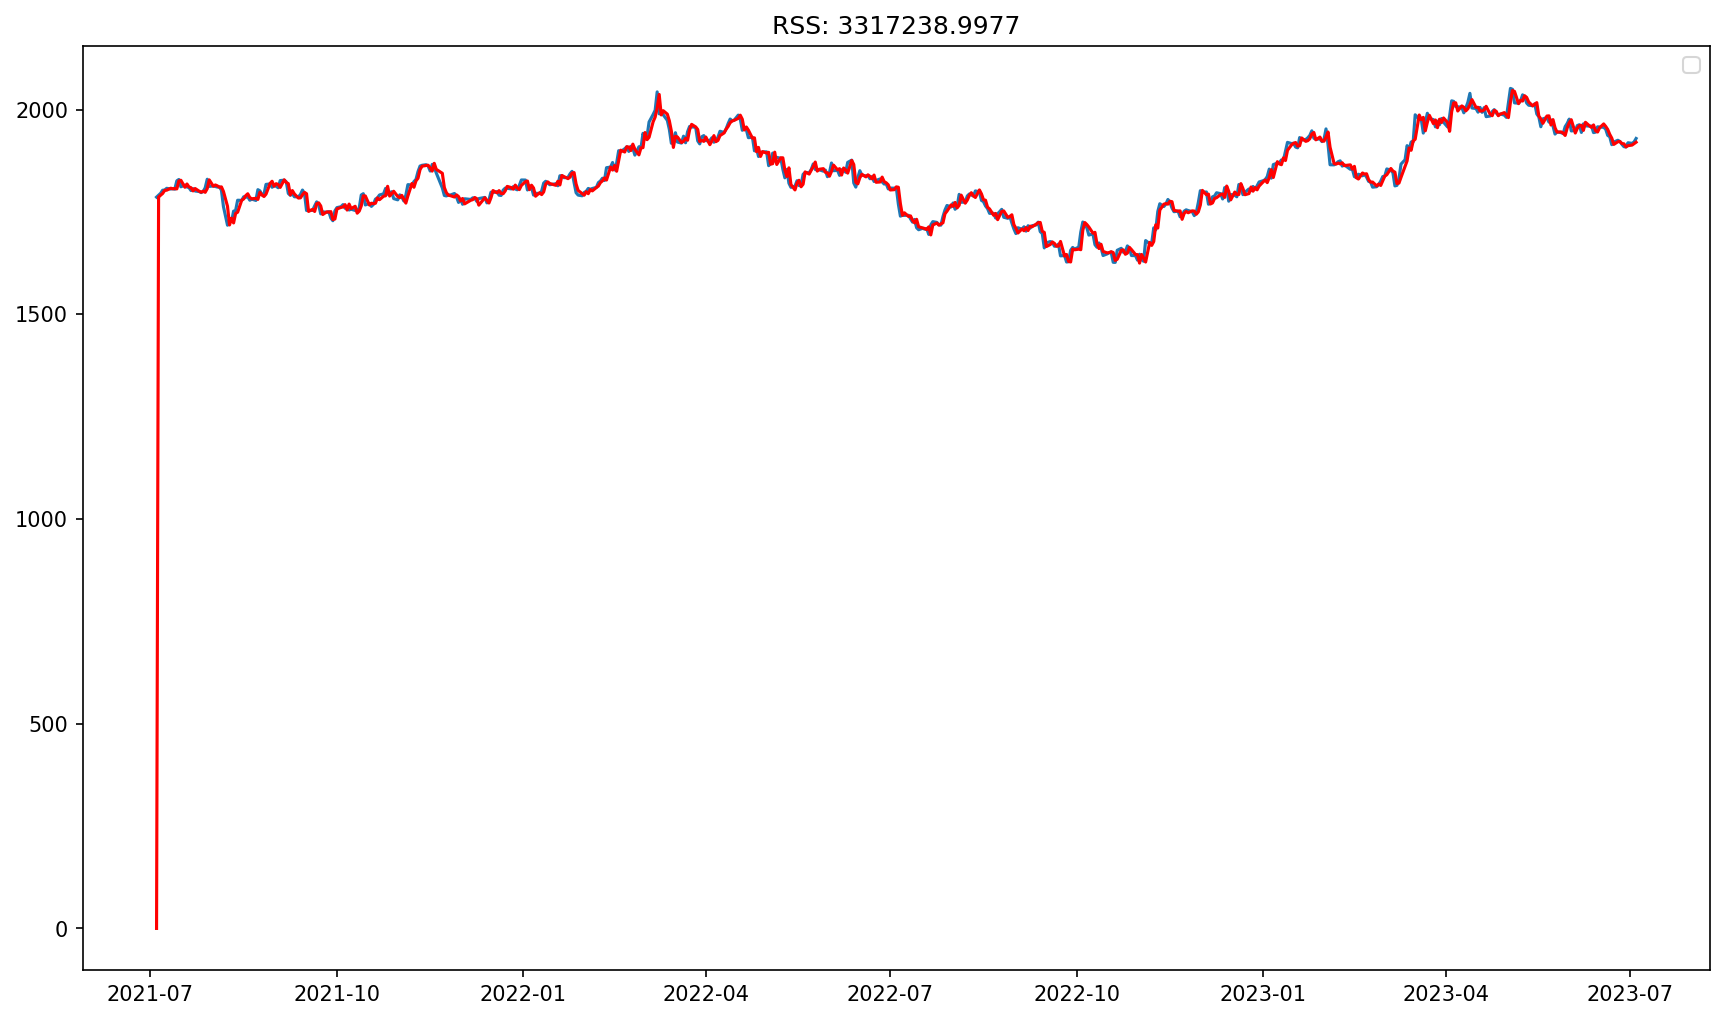

In [26]:
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(df['Close'], order=(0, 1, 40))
results_MA = model.fit()
plt.plot(df['Close'])
plt.plot(results_MA.fittedvalues, color='red')
RSS = results_MA.fittedvalues-df['Close']
RSS.dropna(inplace=True)
plt.title('RSS: %.4f'% sum(RSS**2))
plt.legend(loc = 'best')

In [27]:
print(results_MA.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  622
Model:                ARIMA(0, 1, 40)   Log Likelihood               -2531.169
Date:                Tue, 11 Jul 2023   AIC                           5144.338
Time:                        20:02:13   BIC                           5326.022
Sample:                             0   HQIC                          5214.954
                                - 622                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0023      0.042     -0.054      0.957      -0.084       0.080
ma.L2         -0.0870      0.042     -2.070      0.038      -0.169      -0.005
ma.L3         -0.0012      0.038     -0.032      0.9

## ARIMA Combined model

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


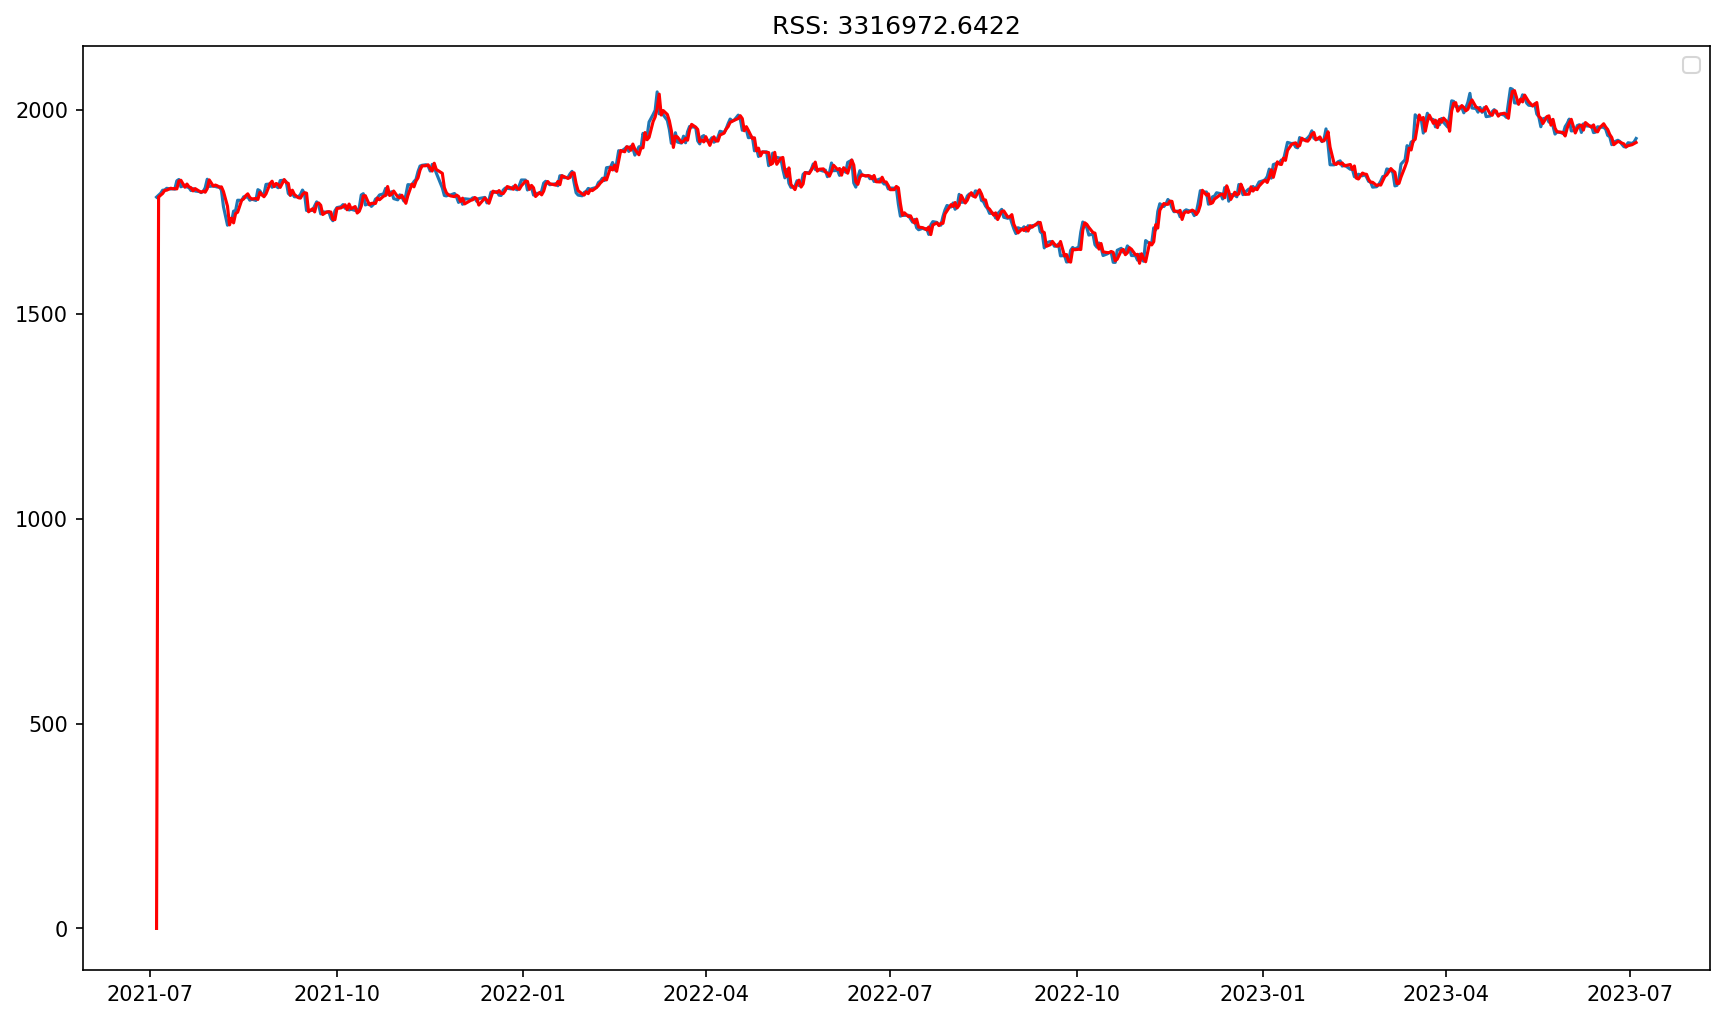

In [28]:
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(df['Close'], order=(1, 1, 40))
results_ARIMA = model.fit()
plt.plot(df['Close'])
plt.plot(results_ARIMA.fittedvalues, color='red')
RSS = results_ARIMA.fittedvalues-df['Close']
RSS.dropna(inplace=True)
plt.title('RSS: %.4f'% sum(RSS**2))
plt.legend(loc = 'best')

In [29]:
print(results_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  622
Model:                ARIMA(1, 1, 40)   Log Likelihood               -2530.532
Date:                Tue, 11 Jul 2023   AIC                           5145.065
Time:                        20:04:38   BIC                           5331.181
Sample:                             0   HQIC                          5217.404
                                - 622                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8273      0.244     -3.395      0.001      -1.305      -0.350
ma.L1          0.8254      0.247      3.346      0.001       0.342       1.309
ma.L2         -0.0889      0.053     -1.669      0.0

# Forecasting

In [32]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff)

Date
2021-07-04       0.000000
2021-07-05    1786.388382
2021-07-06    1791.097277
2021-07-07    1795.251455
2021-07-08    1802.744812
                 ...     
2023-06-29    1909.060402
2023-06-30    1911.920450
2023-07-02    1914.452934
2023-07-03    1917.284399
2023-07-04    1919.847736
Length: 622, dtype: float64


In [31]:
#Convert to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum)

Date
2021-07-04    0.000000e+00
2021-07-05    1.786388e+03
2021-07-06    3.577486e+03
2021-07-07    5.372737e+03
2021-07-08    7.175482e+03
                  ...     
2023-06-29    1.130873e+06
2023-06-30    1.132785e+06
2023-07-02    1.134699e+06
2023-07-03    1.136617e+06
2023-07-04    1.138536e+06
Length: 622, dtype: float64
